In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils # one hot encoding
import matplotlib.pyplot as plt

(28, 28)
(60000, 28, 28)
(10000, 28, 28)


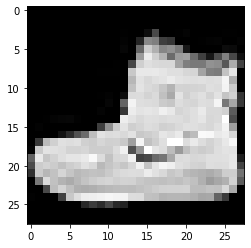

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

print(X_train[0].shape)
print(X_train.shape)
print(X_test.shape)

plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap='gray')

In [3]:
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [4]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [5]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

In [6]:
model = models.Sequential()

In [7]:
model.add(layers.Dense(100, activation='relu', input_shape=(W*H, )))
model.add(layers.Dropout(0.5)) #50%
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25)) #25%
model.add(layers.Dense(10, activation='softmax'))

model.compile('adam','categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)
model_eval=model.evaluate(X_test, Y_test, batch_size=100)

print('loss:{}, accuracy:{}'.format(*model_eval))

Epoch 1/20
480/480 [==============================] - 1s 3ms/step - loss: 0.8642 - accuracy: 0.6880 - val_loss: 0.4888 - val_accuracy: 0.8271
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.7952 - val_loss: 0.4360 - val_accuracy: 0.8387
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 0.5196 - accuracy: 0.8164 - val_loss: 0.4244 - val_accuracy: 0.8483
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.8250 - val_loss: 0.3935 - val_accuracy: 0.8587
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.8319 - val_loss: 0.3832 - val_accuracy: 0.8596
Epoch 6/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4562 - accuracy: 0.8358 - val_loss: 0.3809 - val_accuracy: 0.8639
Epoch 7/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.8389 - val_loss: 0.3699 - val_accuracy: 0.8638
Epoch 

In [8]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    plt.savefig('C:/edna/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Loss.png', dpi=300)
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    plt.savefig('C:/edna/eclipse/springWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Accuracy.png', dpi=300)
    
history=model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8644 - val_loss: 0.3503 - val_accuracy: 0.8709
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8637 - val_loss: 0.3352 - val_accuracy: 0.8765
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8669 - val_loss: 0.3391 - val_accuracy: 0.8773
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8656 - val_loss: 0.3374 - val_accuracy: 0.8811
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3620 - accuracy: 0.8679 - val_loss: 0.3356 - val_accuracy: 0.8777
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8684 - val_loss: 0.3327 - val_accuracy: 0.8808
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3592 - accuracy: 0.8672 - val_loss: 0.3336 - val_accuracy: 0.8803
Epoch 

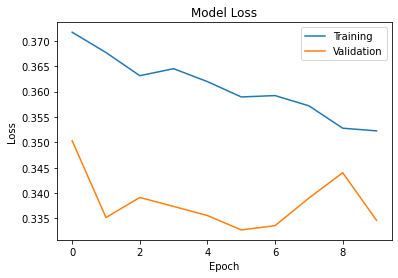

In [9]:
plot_loss(history)

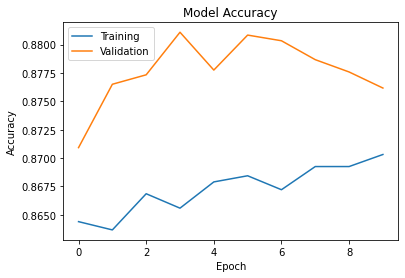

In [10]:
plot_acc(history)

### Image Data Plotting

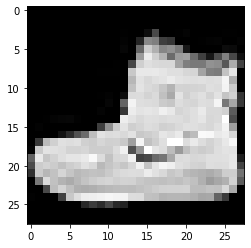

In [11]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

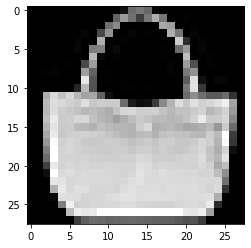

In [12]:
plt.imshow(X_train[100].reshape(28,28), cmap='gray')

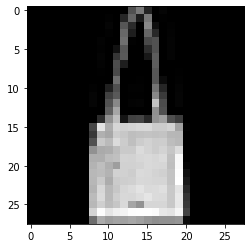

In [13]:
plt.imshow(X_train[200].reshape(28,28), cmap='gray')

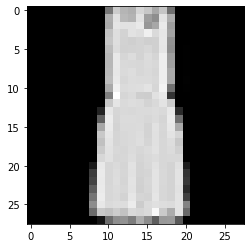

In [14]:
plt.imshow(X_train[30000].reshape(28,28), cmap='gray')

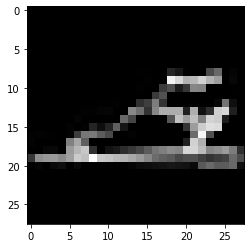

In [15]:
plt.imshow(X_train[300].reshape(28,28), cmap='gray')

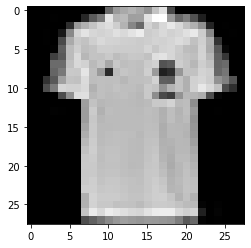

In [16]:
plt.imshow(X_train[2300].reshape(28,28), cmap='gray')

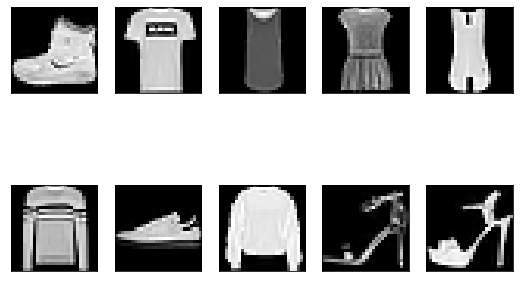

In [17]:
row=2
col=5

grid = range(10)
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(9,6), 
                        subplot_kw={'xticks':[], 'yticks':[]})

for ax, index in zip(axs.flat, grid):
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    
plt.show()